In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json 

In [4]:
instanceName = 'bays29'
numVehicle = 2
objType = 'fair'
file = '../../../../logs/'+instanceName+'-v-'+str(numVehicle)+'-'+objType+'.json'

data = {}
with open(file, 'r') as jsonfile:
    data = json.load(jsonfile)


In [5]:
numVertices = data['numVertices']
numVehicles = data['numVehicles']
vertexCoords = data['vertexCoords']
tours = data['tours']
depot = data['depot']

x_ = [vertex["x"] for vertex in vertexCoords]
y_ = [vertex["y"] for vertex in vertexCoords]

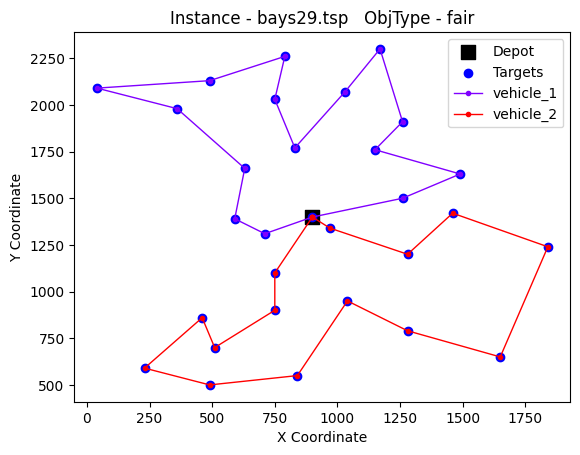

In [6]:
plt.scatter(x_[depot], y_[depot], color='black', marker='s', s=100, label='Depot')
plt.scatter(x_, y_, color='blue', marker='o', label='Targets')

vehicleColors = plt.cm.rainbow(np.linspace(0, 1, numVehicles))

for vehicle in range(numVehicles):
    tour = tours[vehicle]
    tour_x = [vertexCoords[i]["x"] for i in tour]
    tour_y = [vertexCoords[i]["y"] for i in tour]
    tour_x.append(tour_x[0])  # Connect back to the starting point
    tour_y.append(tour_y[0])
    plt.plot(tour_x, tour_y, color=vehicleColors[vehicle], linewidth=1, linestyle='-', marker='.', label = 'vehicle_'+str(vehicle+1))

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Instance - {data["instanceName"]}   ObjType - {data["objectiveType"]}')
plt.legend()

plt.savefig('../plots/'+instanceName+'-v-'+str(numVehicle)+'-'+objType+'.png')


plt.show()

